# Exploratory Data Analysis of ANZ Bank's transaction data

## Import important libraries

In [1]:
%matplotlib inline
import math
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

__author__ = "Bhupen Oli"
__email__ = "b.pen.oli39@gmail.com"

## Load data

In [2]:
original_df= pd.read_csv('ANZ_dataset.csv')

## Explore loaded data

In [3]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  7717 non-null   float64
 2   bpay_biller_code   885 non-null    object 
 3   account            12043 non-null  object 
 4   currency           12043 non-null  object 
 5   long_lat           12043 non-null  object 
 6   txn_description    12043 non-null  object 
 7   merchant_id        7717 non-null   object 
 8   merchant_code      883 non-null    float64
 9   first_name         12043 non-null  object 
 10  balance            12043 non-null  float64
 11  date               12043 non-null  object 
 12  gender             12043 non-null  object 
 13  age                12043 non-null  int64  
 14  merchant_suburb    7717 non-null   object 
 15  merchant_state     7717 non-null   object 
 16  extraction         120

We can see that original dataframe has **12043** total number of records with **23** columns.Columns **bpay_biller_code and merchant_code** has only few non null values which means they do not help in our insights and can be removed from our dataframe. We can also see that **7717** number of records out of total 12043 records involve **card and merchants** while other records do not. Columns **amount, age, balance, card_present_flag, merchant_code** have numeric values while other columns have object data type(string values).

In [4]:
original_df.describe(include=[np.number])

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


Column *car_present_flag* has binary values 0 and 1.Column *balance* has value ranging **from 0.24 AUD to 267128.52** AUD. *Age* ranges from **18 years to 78 years**, which looks normal. The *amount* in each transaction **ranges from 0.10 to 8835 AUD** with mean value of **187.93**.

In [5]:
original_df.describe(include=[np.object])

,status,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,first_name,date,gender,merchant_suburb,merchant_state,extraction,transaction_id,country,customer_id,merchant_long_lat,movement
count,12043,885,12043,12043,12043,12043,7717,12043,12043,12043,7717,7717,12043,12043,12043,12043,7717,12043
unique,2,3,100,1,100,6,5725,80,91,2,1609,8,9442,12043,1,100,2703,2
top,authorized,0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,106e1272-44ab-4dcb-a438-dd98e0071e51,Michael,28/09/2018,M,Melbourne,NSW,2018-09-03T11:00:00.000+0000,565a95a01c724b6bafeaea5406712d58,Australia,CUS-2487424745,151.21 -33.87,debit
freq,7717,883,578,12043,578,3934,14,746,174,6285,255,2169,10,1,12043,578,145,11160


From above description we can see that there is only one currency value(AUD) used, 100 different accounts, 100 unique longitude and latitude(location)values for each customer, 6 unique txn_description ,5725 unique merchants located in 1609 suburbs of 8 different states in Australia.The data consists of 91 unique days.

Let's have a look at few rows of data

In [6]:
original_df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


## Data preparation for analysis

**We are dropping bpay_biller_code and merchant_code to create our final dataframe.** We can see that the transactions are divided into 2 categories for further analysis:

 * Transactions involving merchants
 * Transactions not involving merchants 

In [7]:
final_df=original_df.drop(['bpay_biller_code','merchant_code'],axis=1)

### Extracting month, weekday ,hour from extraction

We want to find whether there is any relationship or differences in transaction number and amount for different month, day of week or hour of day.For getting those insights it will be meaningful to extract those date and time details in different columns.

In [8]:
#changing datatype of extraction from string to datetime
final_df['extraction']=final_df['extraction'].astype('datetime64')

In [9]:
hourValue={0:'12AM',1:'1AM',2:'2AM',3:'3AM',4:'4AM',5:'5AM',6:'6AM',7:'7AM',8:'8AM',
          9:'9AM',10:'10AM',11:'11AM',12:'12PM',13:'1PM',14:'2PM',15:'3PM',16:'4PM',17:'5PM',
          18:'6PM',19:'7PM',20:'8PM',21:'9PM',22:'10PM',23:'11PM'}
final_df['hour']=final_df['extraction'].dt.hour.map(hourValue)
monthValue={8:'August', 9:'September', 10:'October'}
final_df['month']=final_df['extraction'].dt.month.map(monthValue)
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
final_df['weekday'] = final_df['extraction'].dt.dayofweek.map(dayOfWeek)

### Finding the distance between customer location and merchant location

In [10]:
#defining a function to find distance in kilometer from latitude and longitude of source and destination

def long_lat_to_distance_km(geo_df,from_long,from_lat,to_long,to_lat):
    
    # approximate radius of earth in km
    R = 6373.0

    source_lat = geo_df[from_lat].astype('float')*np.pi/180.0                      
    source_long = np.deg2rad(geo_df[from_long].astype('float'))     
    dest_lat = np.deg2rad(geo_df[to_lat].astype('float'))                       
    dest_long = np.deg2rad(geo_df[to_long].astype('float'))  
    d = np.sin((dest_lat - source_lat)/2)**2 + np.cos(source_lat)*np.cos(dest_lat) * np.sin((dest_long - source_long)/2)**2
    
    geo_df['distance_km'] =2 * R * np.arcsin(np.sqrt(d))

In [11]:
#separate longitude and latitude and convert into float datatype 
final_df['customer_long'], final_df['customer_lat'] = final_df['long_lat'].str.split('-', 1).str
final_df['merchant_long'], final_df['merchant_lat'] =final_df['merchant_long_lat'].str.split('-',1).str
final_df['customer_long']=final_df['customer_long'].astype('float64')
final_df['customer_lat']=final_df['customer_lat'].astype('float64')
final_df['merchant_long']=final_df['merchant_long'].astype('float64')
final_df['merchant_lat']=final_df['merchant_lat'].astype('float64')

In [12]:
#find the distance and assign it to new column name 'distance_km'
long_lat_to_distance_km(final_df,'customer_long','customer_lat','merchant_long','merchant_lat')

In [13]:
final_df.head()

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,...,merchant_long_lat,movement,hour,month,weekday,customer_long,customer_lat,merchant_long,merchant_lat,distance_km
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,1/08/2018,...,153.38 -27.99,debit,1AM,August,Wednesday,153.41,27.95,153.38,27.99,5.336746
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,1/08/2018,...,151.21 -33.87,debit,1AM,August,Wednesday,153.41,27.95,151.21,33.87,691.081353
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,1/08/2018,...,151.21 -33.87,debit,1AM,August,Wednesday,151.23,33.94,151.21,33.87,8.002007
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,1/08/2018,...,153.05 -26.68,debit,1AM,August,Wednesday,153.10,27.66,153.05,26.68,109.117466
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,1/08/2018,...,153.44 -28.06,debit,1AM,August,Wednesday,153.41,27.95,153.44,28.06,12.584991


**Let's check for any dubplicate records**

In [14]:
final_df.duplicated().sum()

0

There are no duplicates, we can further analyze our final data frame for further insights through visualization.Let's start it by dividing columns of interest into numerical columns,categorical columns and target variable.

## Visual EDA of prepared data 

### Finding the outliers in amount column

Let's defind a function which finds and removes the outliers from a series of numerical values.

In [15]:
#function calculates outlier values and returns 
def find_outlier(df,col):
    target_stat=df[col].describe()
    IQR=target_stat['75%']-target_stat['25%']
    lower_value=target_stat['25%']- 1.5*IQR
    upper_value=target_stat['75%']+ 1.5*IQR
    return lower_value,upper_value

**Let's create a separate dataframe for purchase transactions and non-purchase transactions**

In [16]:
#create dataframe with purchase data  only and remove outlier as well
purchase_df=final_df[~(final_df['merchant_id'].isnull())]
lower,upper=find_outlier(purchase_df,'amount')
purchase_no_outlier=purchase_df[purchase_df['amount']<upper]
purchase_no_outlier['amount'].describe()

count    7032.000000
mean       21.764916
std        13.674305
min         0.100000
25%        11.367500
50%        18.150000
75%        28.672500
max        66.640000
Name: amount, dtype: float64

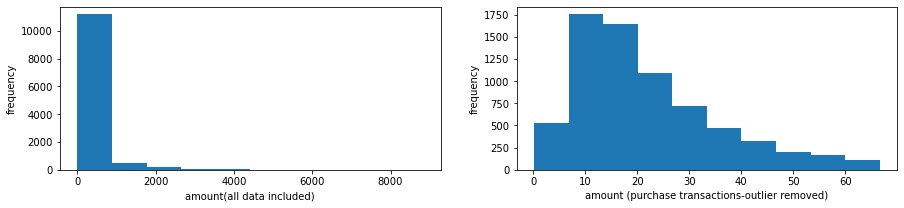

In [17]:
#plot the figure comparing histogram of amount in all transactions and histogram of amount in purchase transactions
fig=plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.hist(final_df['amount'])
plt.xlabel('amount(all data included)')
plt.ylabel('frequency')
plt.subplot(1,2,2)
plt.hist(purchase_no_outlier['amount'])
plt.xlabel('amount (purchase transactions-outlier removed)')
plt.ylabel('frequency')
plt.show()

**Let's create a function to see distribution of different variables.**

In [18]:
#this function explores numerical data visually
def visual_eda_compare(df1,df2,numeric_columns,categorical_columns,target_variable):
    count_category=len(categorical_columns)
    count_numeric=len(numeric_columns)
   # ("Exploring distribution of target variables")
        
    fig=plt.figure(figsize=(15,2))
    plt.subplot(1,2,1)
    sns.boxplot(df1[target_variable])
   # plt.xlabel('all data')
    plt.subplot(1,2,2)
    sns.boxplot(df2[target_variable])
    #plt.xlabel('purchase data without outlier')
    
    
    fig=plt.figure(figsize=(15,6))
   # ('Exploring distribution of numeric columns')
    
    for i in range(0,count_numeric+1,2):
        num_index=int(i/2)
        ax=fig.add_subplot(count_numeric,2,i+1)
        sns.boxplot(df1[numeric_columns[num_index]])
        #plt.xlabel('all data.{}'.format(df1[numeric_columns[num_index]]))
        ax=fig.add_subplot(count_numeric,2,i+2)
        sns.boxplot(df2[numeric_columns[num_index]])
        #plt.xlabel('purchase data without outlier')

    fig=plt.figure(figsize=(15,20))
    for i in range(0,count_category+1,2):
        num_index=int(i/2)
        ax=fig.add_subplot(count_category,2,i+1)
        ax.plot(df1[categorical_columns[num_index]].value_counts().index,df1[categorical_columns[num_index]].value_counts())
        plt.xlabel('overall transactions-all data')
        plt.ylabel('Number of transactions')
        plt.xticks(rotation=45)
        ax=fig.add_subplot(count_category,2,i+2)
        ax.plot(df2[categorical_columns[num_index]].value_counts().index,df2[categorical_columns[num_index]].value_counts())
        plt.xlabel('purchase transactions excluding outlier')
        plt.xticks(rotation=45)

### Comparaing all transactions and purchase transactions

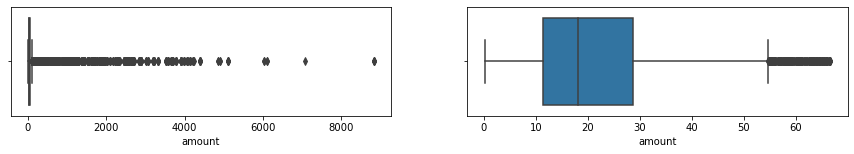

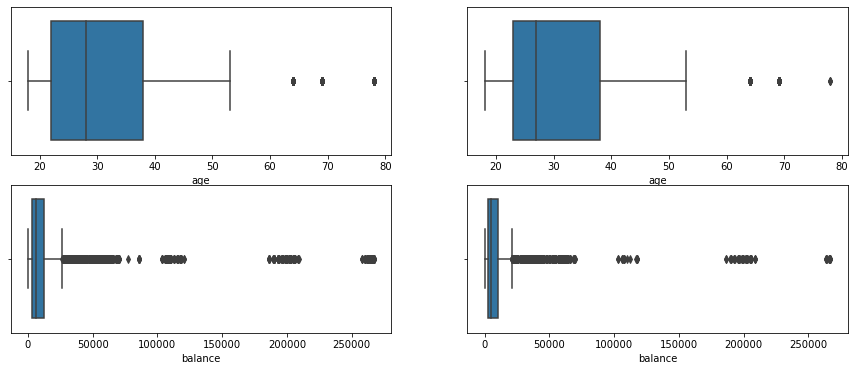

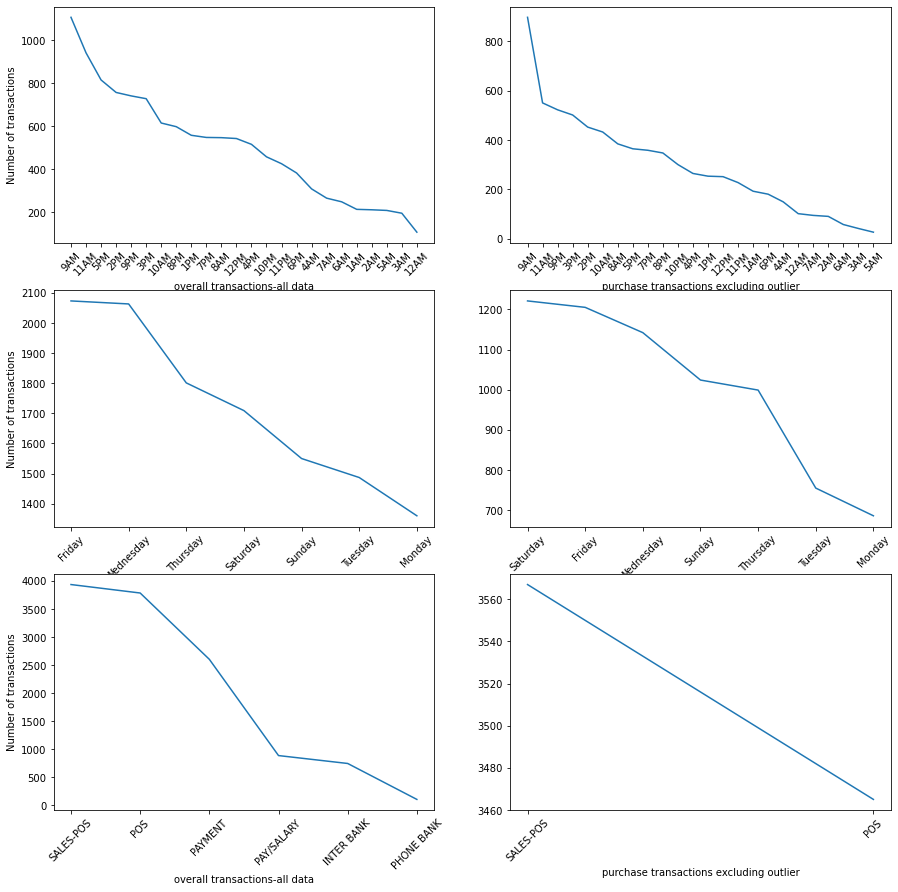

In [19]:
target_variable='amount'
numerical_columns=['age','balance']
categorical_columns=['hour','weekday','txn_description','month']
visual_eda_compare(final_df,purchase_no_outlier,numerical_columns,categorical_columns,target_variable)

As can be seen in above plots, median value of 'amount' is slightly lower for purchase transactions than overall transactions.There is no significant differences in ages of customers for overall transaction and purchase transactions. Similarly, we can also see that most of the transactions are made at **9AM and 11 AM.** For overall transactions lowest number of transactions occur at **12 AM**, but for purchase transactions lowest number of transactions occur at **5AM**.Maximum number of overall transactions occur on **Wednesday**,while maximum number of purchase transactions occur on **Saturday**.Purchase transactions does not have **'Payment,Interbank,phone bank'** methods of transaction and maximum number of transactions are Sales-POS.

### Exploring distance in purchase transactions

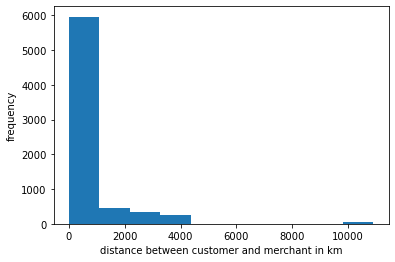

In [20]:
plt.hist(purchase_no_outlier['distance_km'])
plt.xlabel('distance between customer and merchant in km')
plt.ylabel('frequency')
plt.show()

There are certain purchase made from more than 8000 km away.Let's examine those data.

In [21]:
purchase_df_distant=purchase_no_outlier[purchase_no_outlier['distance_km']>5000]
purchase_df_distant['customer_id'].describe()

count                 54
unique                 1
top       CUS-1617121891
freq                  54
Name: customer_id, dtype: object

There are 54 transactions from single customer living more than 5000 km away.Let's remove the outlier values in distance and explore for more commmon values.

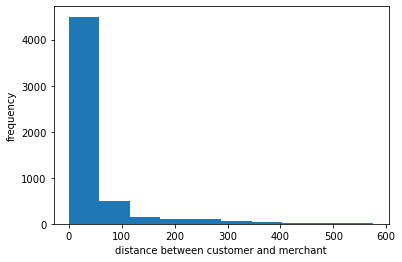

In [22]:
lower,upper=find_outlier(purchase_no_outlier,'distance_km')
purchase_df_common=purchase_no_outlier[(purchase_no_outlier['distance_km']<upper) &(purchase_no_outlier['distance_km']>lower)]
plt.hist(purchase_df_common['distance_km'])
plt.xlabel('distance between customer and merchant')
plt.ylabel('frequency')
plt.show()

It can be seen that most frequent distance customers visit for making transactions is within 50km of their residence.

### Visually exploring relationship of different variables with 'total amount'

We are defining a function which can explore the relationship of 'amount' with other variables

In [23]:
#this function will visualize the relationship between different categorical and numerical variable with the target variable
def visual_eda_relation(df,num_col,cat_col,target_var):
    count_cat=len(cat_col)
    count_num=len(num_col)
    #plot the relation of numeric variables(mean and standard deviation) with target variable
    fig=plt.figure(figsize=(15,3))
    
    for i in range(0,count_num):
        ax=fig.add_subplot(math.ceil(count_num/2),2,i+1)
        sns.lineplot(x=num_col[i],y=target_var,data=df,ci="sd")
    
    #plot the relation of categorical variable with target variable in ascending order
    fig=plt.figure(figsize=(15,20))
    
    for i in range(0,count_cat):
        #create subplot of 2 column and required number of rows
        ax=fig.add_subplot(math.ceil(count_cat/2),2,i+1)
        
        #create cat_ordered_list for the order argument of boxplot function
        cat_ordered=df.groupby(cat_col[i]).agg({target_var:'sum'}).sort_values(target_var)
        cat_ordered_list=cat_ordered.index
        
        #create the real plot
        sns.barplot(x=cat_ordered_list,y=target_var,data=cat_ordered,order=cat_ordered_list)
        plt.xticks(rotation=45)

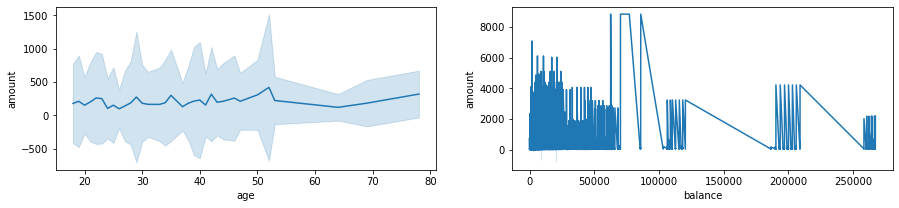

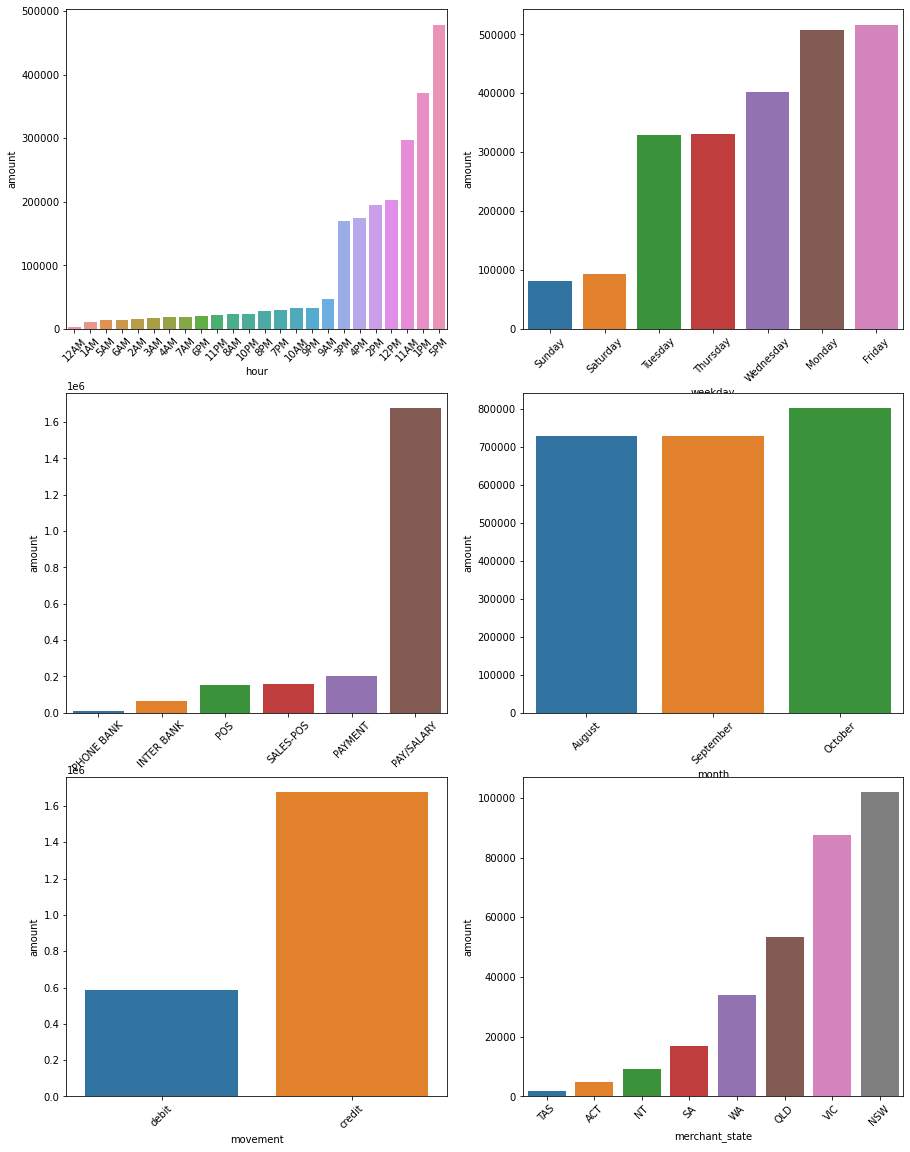

In [24]:
categorical_columns=['hour','weekday','txn_description','month','movement','merchant_state']
visual_eda_relation(final_df,numerical_columns,categorical_columns,target_variable)

From above relationship of **amount** with other variables , we can see some interesting facts such as **Pay/Salary** makes highest amount of transactions despite being the lowest number of transactions which is quite expected.Despite **Monday** having very less number of transactions, the amount of transactions is among the highest which may have been due to **pay/salary**.Although number of transactions is the highest at 9 AM , the amount made by those transactions are lower than those made at any hour between **11AM-5PM** with 5 PM contributing to the highest amount.